In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Analysis.Taxonomy import *

from MERFISH_Objects.FISHData import *

from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt 

In [2]:
base_path = '/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/'
dataset = 'DPNMF_PolyA_2021Nov19'
fishdata = FISHData(os.path.join(base_path,'fishdata'))
data = fishdata.load_data('h5ad',dataset=dataset)
data.obs_names_make_unique()

data.X = data.layers['total_vectors']
data = data[np.isnan(data.X.max(1))==False]

data.X = data.X/data.obs['total_signal'][:,None]
data.X = data.X - np.array([np.percentile(data.X[:,i],25) for i in range(data.X.shape[1])])
data.X = data.X / np.array([np.percentile(data.X[:,i],75) for i in range(data.X.shape[1])])
data.X = normalize(data.X)

XY = np.asarray([data.obs['stage_y'], data.obs['stage_x']])
XY = np.transpose(XY)
data.obsm['stage'] = XY

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/tmp/ipykernel_4086211/676460092.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data.X = data.X/data.obs['total_signal'][:,None]


In [3]:
TMG = TissueMultiGraph()
TMG.createCellAndZoneLayers(XY,data.X,initRes = 7.15416)


Build similarity graph 
calculation took: 72.10
Calling initial optimization
calculation took: 72.11
Initial types found: 100


In [4]:
TMG.addEnvironmentLayers()

Build similarity graph 
calculation took: 27.09
Calling initial optimization
 
 Func-count     x          f(x)          Procedure
    1        11.5208      -6.9443        initial
    2        18.5792     -6.63025        golden
    3        7.15843     -7.35546        golden
    4        4.46235     -7.55756        golden
    5        2.79608     -7.82613        golden
    6        1.76627     -8.09645        golden
    7        1.12981     -8.34978        golden
    8       0.736458     -8.51193        golden
    9       0.493353     -8.65396        golden
   10       0.343106      -8.7483        golden
   11       0.250247     -8.87495        golden
   12       0.192858     -8.93939        golden
   13       0.157389     -9.06788        golden
   14       0.135469     -8.92943        golden
   15       0.164664     -9.05358        parabolic
   16       0.149016     -8.99232        golden
   17       0.154056     -8.99917        parabolic
   18       0.160723       -9.051        parabo

[97786, 53289, 9725, 3482, 1597, 857, 651, 574, 515, 489, 457, 382, 336, 298, 282, 218, 183, 160, 131, 117, 88, 62, 41, 41]


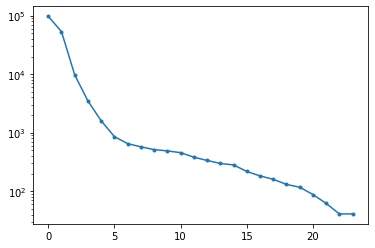

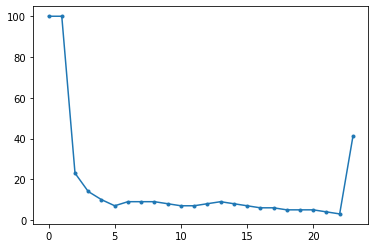

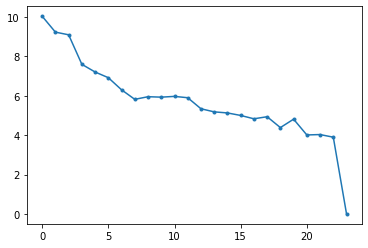

In [5]:
Ent = [l.CondEntropy() for l in TMG.Layers]
N = [l.N for l in TMG.Layers]
plt.semilogy(N,'.-')
print(N)
Ntypes =  [l.Ntypes for l in TMG.Layers]
plt.figure()
plt.plot(Ntypes,'.-')
plt.figure()
plt.plot(Ent,'.-')

1.5472998232637227


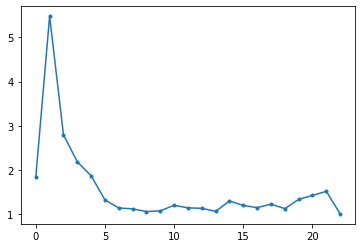

In [6]:
N=np.array(N)
plt.plot(N[0:-1]/N[1:],'.-')
print(mean(N[0:-1]/N[1:]))

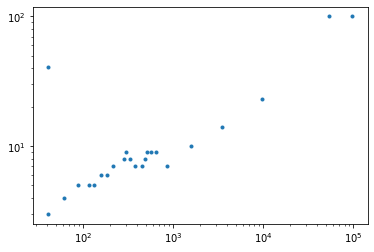

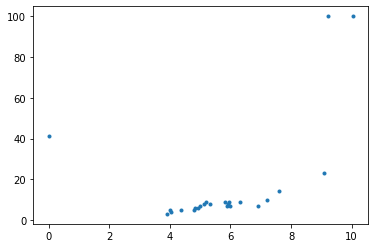

In [7]:
plt.figure()
plt.loglog(N,Ntypes,'.')
plt.figure()
plt.plot(Ent,Ntypes,'.')

In [ ]:
for i in range(len(TMG.Layers)): 
    TMG.scatter(i)